In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
cars_data = pd.read_csv("/Users/mohamedibrahim/Desktop/2-semester.nosync/ml-ai/mandatory1/notebooks/cars.csv")

# Check the first few rows
cars_data.head(n=5)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [68]:
# get an overview of the data
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [69]:
# Convert the 'horsepower' column to numeric, coerce errors to NaN, then drop them - other method maybe better?
cars_data['horsepower'] = pd.to_numeric(cars_data['horsepower'], errors='coerce')
cars_data.dropna(inplace=True)


In [70]:
# We now only have 392 entries due to operation above
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [71]:
cars_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


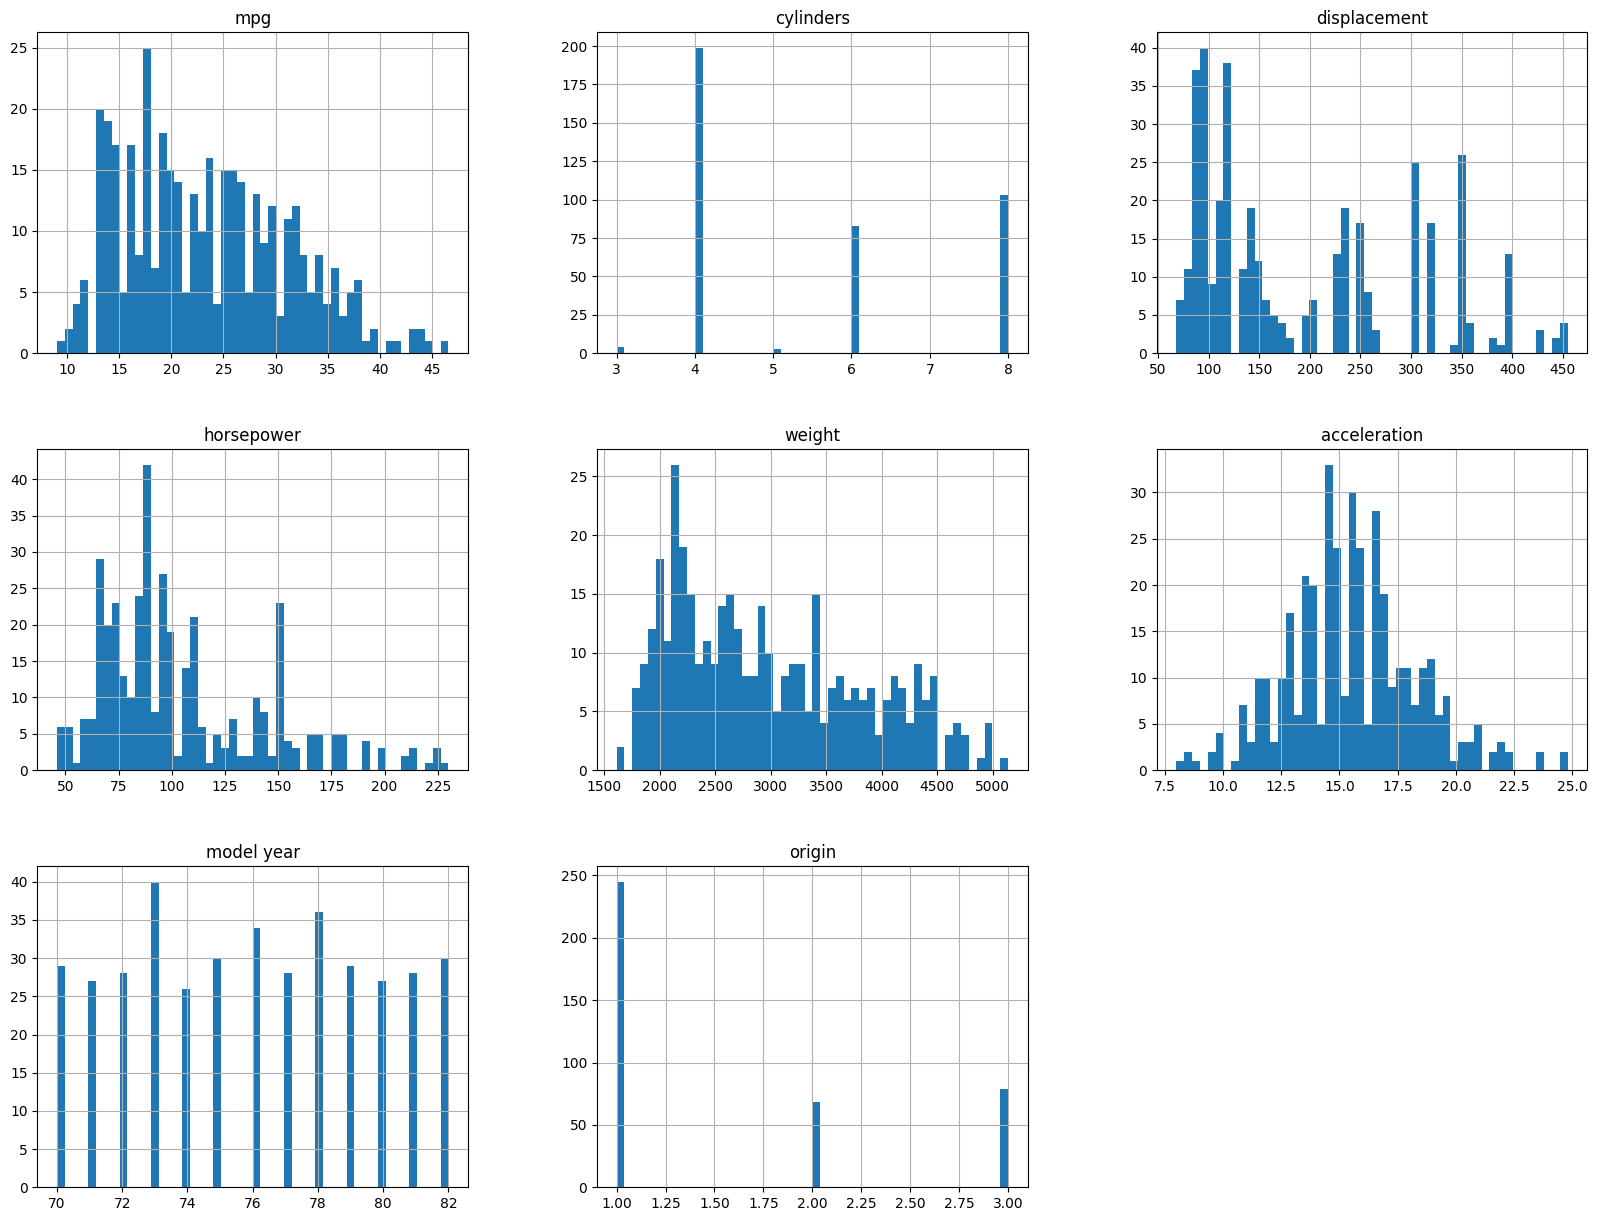

In [72]:
import matplotlib.pyplot as plt 
cars_data.hist(bins=50, figsize=(20,15)) 
plt.show()

<Axes: xlabel='mpg', ylabel='displacement'>

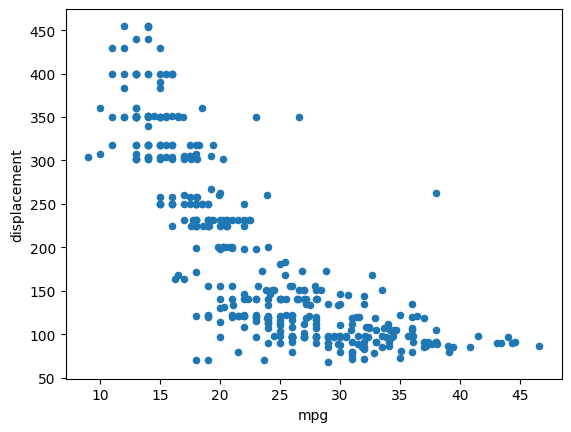

In [73]:
cars_data.plot(kind='scatter', x="mpg", y="displacement")

<Axes: xlabel='cylinders', ylabel='displacement'>

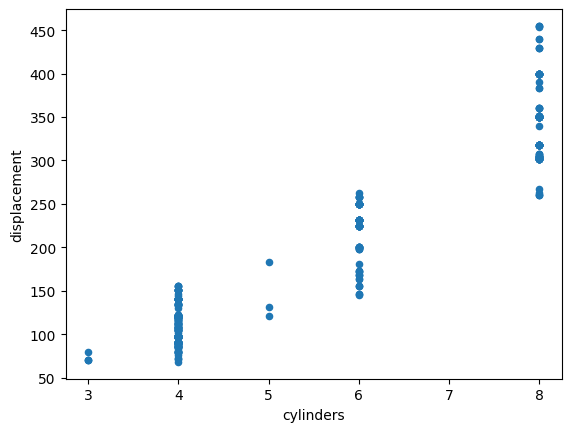

In [81]:
cars_data.plot(kind='scatter', x="cylinders", y="displacement")

<Axes: xlabel='weight', ylabel='displacement'>

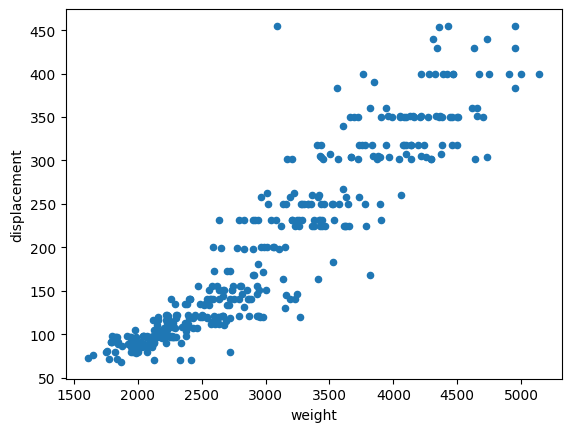

In [82]:
cars_data.plot(kind='scatter', x="weight", y="displacement")

In [76]:
# get the mean of the displacement, we will use this to later create a binary target valriable:
mean_displacement = cars_data['displacement'].mean()

# binary target variable for logistic regression
cars_data['large_engine'] = (cars_data['displacement'] > mean_displacement).astype(int)


# Remove non-numeric and target columns from the feature set
X_engine = cars_data.drop(['displacement', 'car name', 'large_engine'], axis=1)
y_engine = cars_data['large_engine']



In [77]:
X_train_engine, X_test_engine, y_train_engine, y_test_engine = train_test_split(
    X_engine, y_engine, test_size=0.2, random_state=42)


In [78]:
from sklearn.linear_model import LogisticRegression

engine_logistic_model = LogisticRegression(max_iter=1000)
engine_logistic_model.fit(X_train_engine, y_train_engine)


LogisticRegression(max_iter=1000)

In [79]:
from sklearn.metrics import accuracy_score

# Predicting and evaluating the logistic regression model
y_pred_engine = engine_logistic_model.predict(X_test_engine)
engine_accuracy = accuracy_score(y_test_engine, y_pred_engine)


print(f"Accuracy of the logistic regression model: {engine_accuracy}")


Accuracy of the logistic regression model: 0.9873417721518988


In [101]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have the 'cars_data' DataFrame already preprocessed as earlier
mean_displacement = cars_data['displacement'].mean()
cars_data['large_engine'] = (cars_data['displacement'] > mean_displacement).astype(int)
X_engine = cars_data.drop(['displacement', 'car name', 'large_engine'], axis=1)
y_engine = cars_data['large_engine']

# Splitting the dataset
X_train_engine, X_test_engine, y_train_engine, y_test_engine = train_test_split(
    X_engine, y_engine, test_size=0.2, random_state=42)

# Creating and training the SGDClassifier
# Best Parameters: {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'optimal', 'max_iter': 2000, 'penalty': 'l1', 'tol': 0.001}
sgd_classifier = SGDClassifier(loss='log_loss', max_iter=2000, alpha=0.001, tol=1e-3, eta0=0.1, learning_rate="optimal", penalty="l1")
sgd_classifier.fit(X_train_engine, y_train_engine)

# Predicting and evaluating the model
y_pred_engine = sgd_classifier.predict(X_test_engine)
accuracy = accuracy_score(y_test_engine, y_pred_engine)

print(f"Accuracy of the SGDClassifier model: {accuracy}")


Accuracy of the SGDClassifier model: 0.9493670886075949


In [97]:
from sklearn.model_selection import GridSearchCV

# Parameters for GridSearchCV
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': [1000, 2000],
    'tol': [1e-3, 1e-4],
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': [0.01, 0.1, 1]
}

# Grid Search with Cross-Validation
grid_search = GridSearchCV(SGDClassifier(loss='log_loss'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_engine, y_train_engine)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


/Users/mohamedibrahim/Library/Caches/pypoetry/virtualenvs/ml-ai-UppXXCh_-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/mohamedibrahim/Library/Caches/pypoetry/virtualenvs/ml-ai-UppXXCh_-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/mohamedibrahim/Library/Caches/pypoetry/virtualenvs/ml-ai-UppXXCh_-py3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/mohamedibrahim/Library/Caches/pypoetry/virtualenvs/ml-ai-UppXXCh_-py3.11/lib/python3.11/si

Best Parameters: {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'optimal', 'max_iter': 2000, 'penalty': 'l1', 'tol': 0.001}
Best Score: 0.9456733230926779
